<a href="https://colab.research.google.com/github/anugoon1374/MSHackatron2022/blob/main/ComputerVisionFactoryPrototype_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras==2.2.5
!pip install tensorflow-gpu==1.15.5

     |████████████████████████████████| 411.0MB 42kB/s 


In [ ]:
from keras.preprocessing.image import ImageDataGenerator 

Using TensorFlow backend.


In [ ]:
!unzip Images.zip

Archive:  Images.zip
replace Images/Test/Bad/IMG_3207 (Medium).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

original Image


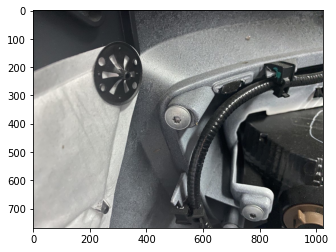

image dimensions:  (768, 1024, 3)
Keras Array dimensions:  (1, 768, 1024, 3)
transformed Images


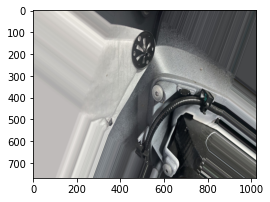

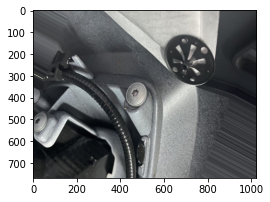

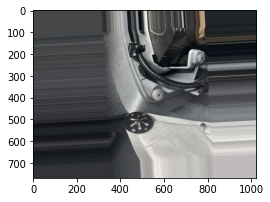

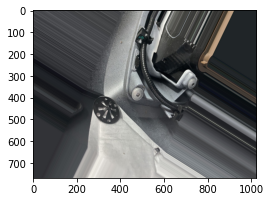

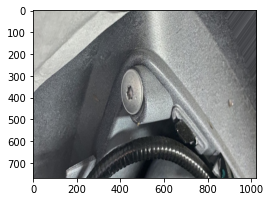

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img

testImage = load_img('Images/Train/Good/IMG_3084 (Medium).jpg')  
testImageArray = np.array(testImage)

print("original Image")
plt.imshow(testImageArray)
plt.show()

print("image dimensions: ", testImageArray.shape)
testImageArrayKeras = testImageArray.reshape((1,) + testImageArray.shape)  
print("Keras Array dimensions: ",testImageArrayKeras.shape)

sampleDatagen = ImageDataGenerator(shear_range=0.1,zoom_range=0.8,width_shift_range=0.1,rotation_range=120)
sampleDatagenFlow = sampleDatagen.flow(testImageArrayKeras,batch_size=1)

print("transformed Images")
for i in range(5):
    batches = next(sampleDatagenFlow)
    gen_img = batches[0].astype(np.uint8)
    plt.figure(figsize=(4, 4))
    plt.imshow(gen_img)
plt.show()


In [ ]:
trainDirectory = 'Images/Train'
validationDirectory = 'Images/Validation'
batch_size=16

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=270)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(trainDirectory,target_size=(150,150),
                                                    batch_size=batch_size, class_mode='binary',shuffle=True)  

validation_generator = test_datagen.flow_from_directory(validationDirectory,target_size=(150,150),
                                                        batch_size=batch_size,class_mode='binary',shuffle=True)

Found 76 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(8, (12, 12),input_shape=(150,150, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (6, 6),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 139, 139, 8)       3464      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 69, 69, 8)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 64, 64, 16)        4624      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 7200)            

In [ ]:
result=model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,
        validation_data=validation_generator,validation_steps=10)

Epoch 1/20
100/100 [==============================] - 27s 271ms/step - loss: 0.6507 - acc: 0.6681 - val_loss: 0.6391 - val_acc: 0.6694
Epoch 2/20
100/100 [==============================] - 25s 251ms/step - loss: 0.6502 - acc: 0.6708 - val_loss: 0.6332 - val_acc: 0.6613
Epoch 3/20
100/100 [==============================] - 25s 251ms/step - loss: 0.5692 - acc: 0.6710 - val_loss: 0.4821 - val_acc: 0.6696
Epoch 4/20
100/100 [==============================] - 25s 251ms/step - loss: 0.4568 - acc: 0.6810 - val_loss: 0.4130 - val_acc: 0.6855
Epoch 5/20
100/100 [==============================] - 25s 251ms/step - loss: 0.4109 - acc: 0.7779 - val_loss: 0.3740 - val_acc: 0.8226
Epoch 6/20
100/100 [==============================] - 25s 250ms/step - loss: 0.3713 - acc: 0.8323 - val_loss: 0.3338 - val_acc: 0.9196
Epoch 7/20
100/100 [==============================] - 25s 251ms/step - loss: 0.3468 - acc: 0.8477 - val_loss: 0.4397 - val_acc: 0.7339
Epoch 8/20
100/100 [==============================] - 2

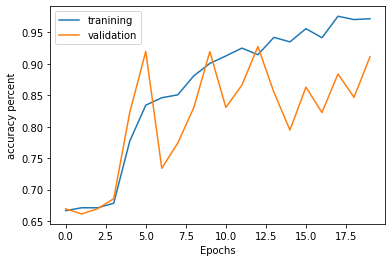

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result.history['acc'],label="tranining")
plt.plot(result.history['val_acc'],label="validation")
plt.xlabel('Epochs')
plt.ylabel('accuracy percent')
plt.legend()
plt.show()

In [ ]:
model.save("TrainedSimpleCNN")

# Implement model

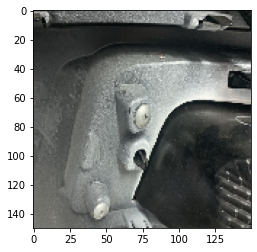

IMG_3134 (Medium).jpg [[0.9226803]]


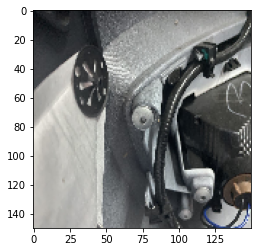

IMG_3085 (Medium).jpg [[0.99358636]]


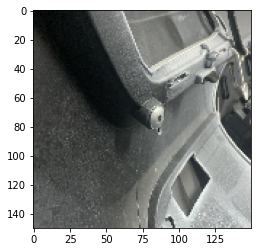

IMG_3107 (Medium).jpg [[0.9999999]]


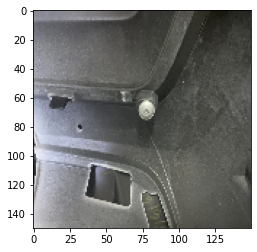

IMG_3178 (Medium).jpg [[1.]]


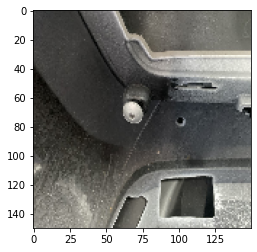

IMG_3169 (Medium).jpg [[1.]]


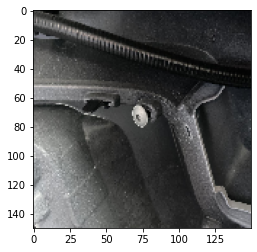

IMG_3167 (Medium).jpg [[1.]]


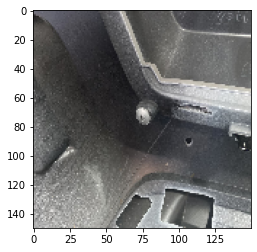

IMG_3102 (Medium).jpg [[1.]]


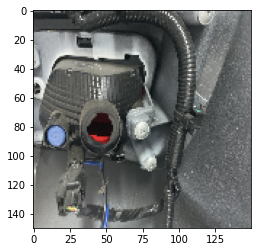

IMG_3145 (Medium).jpg [[0.9999995]]


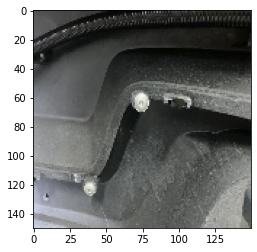

IMG_3129 (Medium).jpg [[1.]]


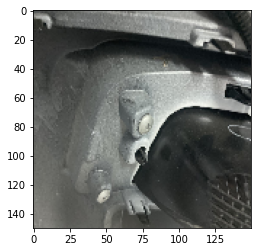

IMG_3131 (Medium).jpg [[0.9999236]]


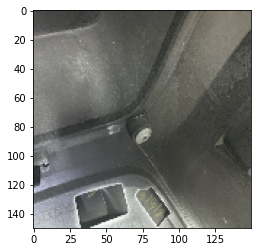

IMG_3118 (Medium).jpg [[0.99999964]]


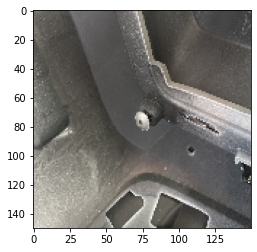

IMG_3170 (Medium).jpg [[1.]]


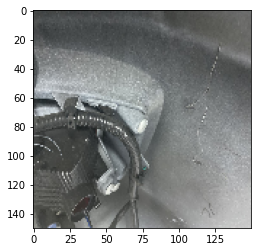

IMG_3147 (Medium).jpg [[0.98469007]]


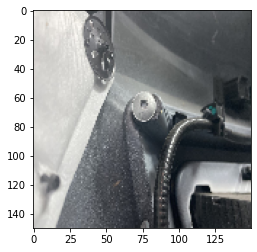

IMG_3089 (Medium).jpg [[0.60853267]]


In [ ]:
import os
from keras.preprocessing import image 

for filename in os.listdir("Images/Test/Good/"):
    if filename.endswith(".jpg"): 
        testImage= image.load_img(os.path.join("Images/Test/Good/", filename),target_size=(150,150))
        #show image 
        plt.imshow(testImage)
        plt.show()
        
        testImage= image.img_to_array(testImage)
        testImage = testImage.reshape((1,) + testImage.shape)  
        testImage = testImage / 255.0   
        result=model.predict(testImage)
        print(filename,result)

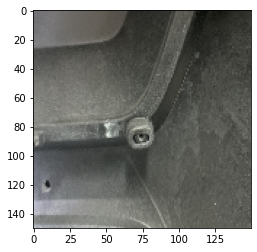

IMG_3219 (Medium).jpg [[0.03232029]]


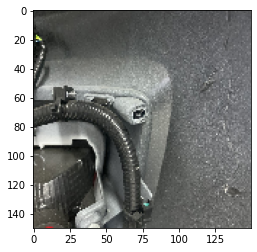

IMG_3207 (Medium).jpg [[0.38743305]]


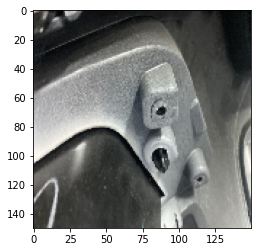

IMG_3241 (Medium).jpg [[0.6654591]]


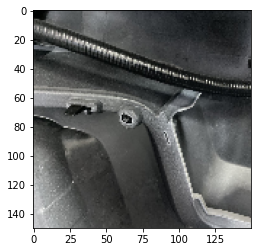

IMG_3232 (Medium).jpg [[0.15101549]]


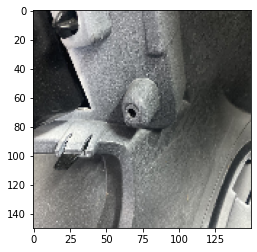

IMG_3253 (Medium).jpg [[0.33813962]]


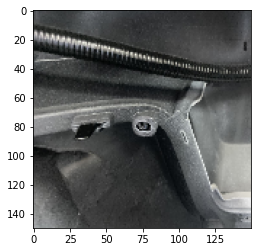

IMG_3231 (Medium).jpg [[0.25504947]]


In [ ]:
import os
from keras.preprocessing import image 

for filename in os.listdir("Images/Test/Bad/"):
    if filename.endswith(".jpg"): 
        testImage= image.load_img(os.path.join("Images/Test/Bad/", filename),target_size=(150,150))
        #show image 
        plt.imshow(testImage)
        plt.show()
        
        testImage= image.img_to_array(testImage)
        testImage = testImage.reshape((1,) + testImage.shape)  
        testImage = testImage / 255.0   
        result=model.predict(testImage)
        print(filename,result)

# Use a pre-trained model

# Model Fine-tuning

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
vgg_conv = VGG16(weights=None, include_top=False, input_shape=(150,150, 3))
Inception=InceptionResNetV2(weights="imagenet", include_top=False, input_shape=(150,150, 3))

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
from keras import models
from keras import layers
from keras import optimizers

# Create the model
fineTunedmodel = models.Sequential()
 
# Add the vgg convolutional base model
fineTunedmodel.add(Inception)
fineTunedmodel.add(layers.Flatten())
fineTunedmodel.add(layers.Dense(16, activation='relu'))
fineTunedmodel.add(layers.Dropout(0.5))
fineTunedmodel.add(layers.Dense(1, activation='sigmoid'))
 
fineTunedmodel.summary()
fineTunedmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_20 (Flatten)         (None, 13824)             0         
_________________________________________________________________
dense_42 (Dense)             (None, 16)                221200    
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 17        
Total params: 54,557,953
Trainable params: 54,497,409
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
result=fineTunedmodel.fit(train_generator,steps_per_epoch=train_generator.n// batchSize,epochs=40,
        validation_data=validation_generator,validation_steps=validation_generator.n // batchSize)

Epoch 1/40
9/9 [==============================] - 22s 719ms/step - loss: 1.8651 - accuracy: 0.5682 - val_loss: 0.6937 - val_accuracy: 0.3125
Epoch 2/40
9/9 [==============================] - 2s 213ms/step - loss: 0.6536 - accuracy: 0.3674 - val_loss: 0.6934 - val_accuracy: 0.3438
Epoch 3/40
9/9 [==============================] - 2s 213ms/step - loss: 0.6788 - accuracy: 0.4535 - val_loss: 0.6928 - val_accuracy: 0.6562
Epoch 4/40
9/9 [==============================] - 2s 214ms/step - loss: 0.6810 - accuracy: 0.6520 - val_loss: 0.7021 - val_accuracy: 0.6250
Epoch 5/40
9/9 [==============================] - 2s 216ms/step - loss: 0.6803 - accuracy: 0.6353 - val_loss: 0.7141 - val_accuracy: 0.6250
Epoch 6/40
9/9 [==============================] - 2s 213ms/step - loss: 0.6742 - accuracy: 0.7153 - val_loss: 0.7425 - val_accuracy: 0.6250
Epoch 7/40
9/9 [==============================] - 2s 213ms/step - loss: 0.6377 - accuracy: 0.7676 - val_loss: 0.7566 - val_accuracy: 0.7188
Epoch 8/40
9/9 [===

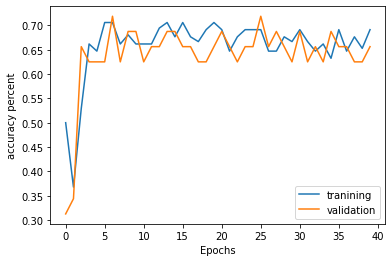

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'],label="tranining")
plt.plot(result.history['val_accuracy'],label="validation")
plt.xlabel('Epochs')
plt.ylabel('accuracy percent')
plt.legend()
plt.show()

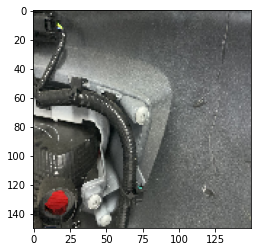

IMG_3152 (Medium).jpg [[0.50106496]]


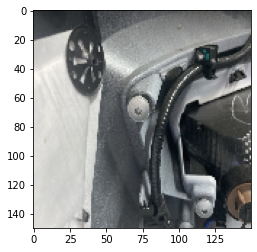

IMG_3158 (Medium).jpg [[0.50106496]]


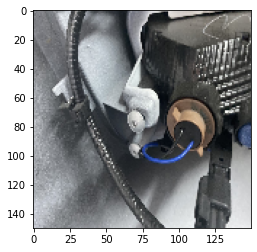

IMG_3160 (Medium).jpg [[0.50106496]]


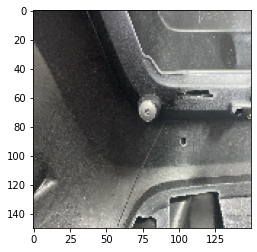

IMG_3104 (Medium).jpg [[0.50106496]]


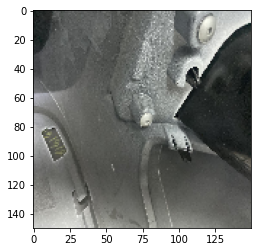

IMG_3138 (Medium).jpg [[0.50106496]]


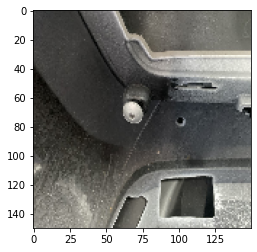

IMG_3169 (Medium).jpg [[0.50106496]]


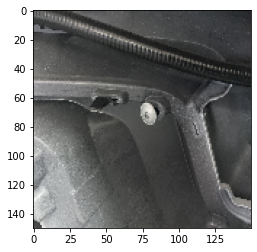

IMG_3200 (Medium).jpg [[0.50106496]]


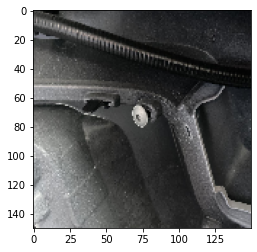

IMG_3167 (Medium).jpg [[0.50106496]]


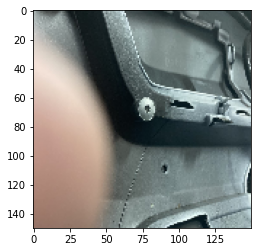

IMG_3109 (Medium).jpg [[0.50106496]]


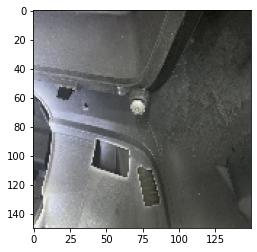

IMG_3177 (Medium).jpg [[0.50106496]]


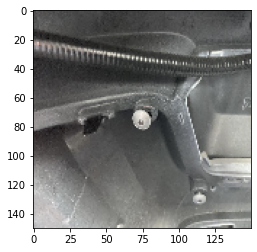

IMG_3165 (Medium).jpg [[0.50106496]]


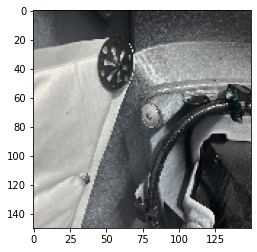

IMG_3083 (Medium).jpg [[0.50106496]]


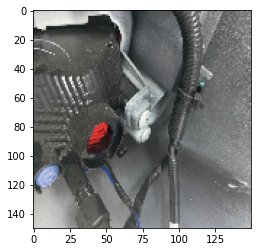

IMG_3143 (Medium).jpg [[0.50106496]]


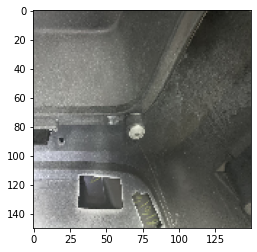

IMG_3117 (Medium).jpg [[0.50106496]]


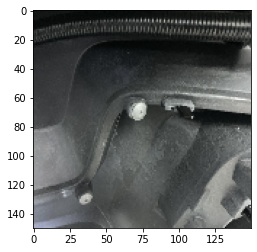

IMG_3125 (Medium).jpg [[0.50106496]]


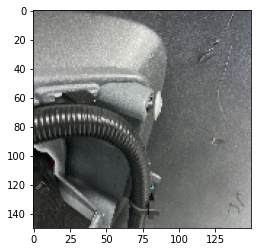

IMG_3194 (Medium).jpg [[0.50106496]]


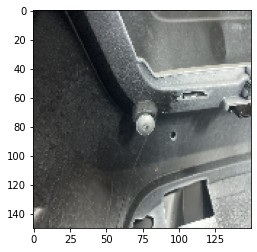

IMG_3174 (Medium).jpg [[0.50106496]]


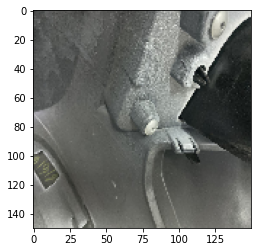

IMG_3137 (Medium).jpg [[0.50106496]]


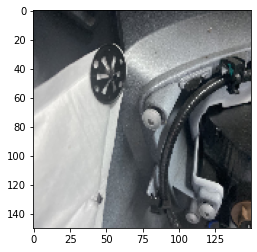

IMG_3156 (Medium).jpg [[0.50106496]]


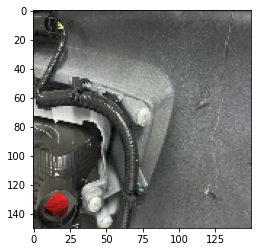

IMG_3151 (Medium).jpg [[0.50106496]]


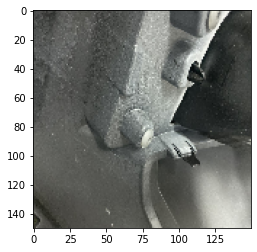

IMG_3136 (Medium).jpg [[0.50106496]]


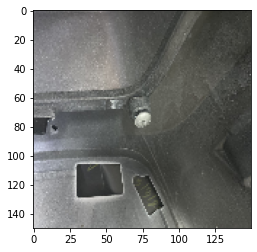

IMG_3197 (Medium).jpg [[0.50106496]]


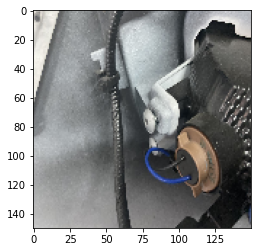

IMG_3163 (Medium).jpg [[0.50106496]]


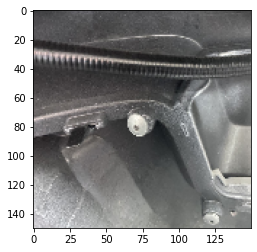

IMG_3100 (Medium).jpg [[0.50106496]]


In [ ]:
import os
from keras.preprocessing import image 

for filename in os.listdir("Images/Validation/Good/"):
    if filename.endswith(".jpg"): 
        testImage= image.load_img(os.path.join("Images/Validation/Good/", filename),target_size=(150,150))
        #show image 
        plt.imshow(testImage)
        plt.show()
        
        testImage= image.img_to_array(testImage)
        testImage = testImage.reshape((1,) + testImage.shape)  
        testImage = testImage / 255.0   
        result=fineTunedmodel.predict(testImage)
        print(filename,result)